In [8]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition
import numpy as np

In [9]:
X, Y = datasets.load_wine(return_X_y=True)
X = preprocessing.scale(X)

In [10]:
pca = decomposition.PCA(2)
U = pca.fit_transform(X)

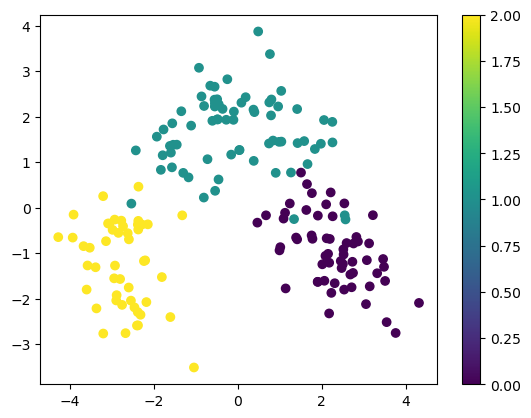

In [11]:
cs = plt.scatter(U[:,0], U[:,1], c=Y)
plt.colorbar(cs)
plt.show()

In [12]:
U01 = U[Y != 2]
Y01 = Y[Y != 2]
Y01[Y01 == 0] = -1
Y01 = Y01.astype("d")

U01 = np.ascontiguousarray(U01)
Y01 = np.ascontiguousarray(Y01)

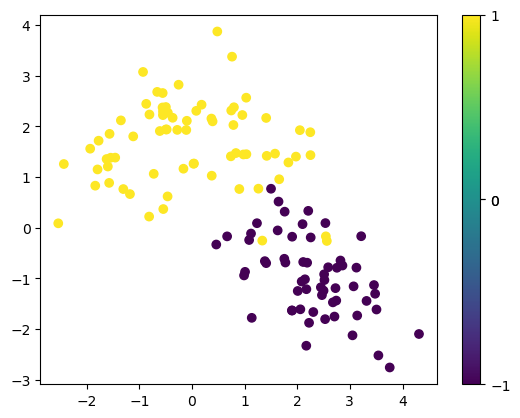

In [13]:
cs = plt.scatter(U01[:,0], U01[:,1], c=Y01)
plt.colorbar(cs, ticks=[-1.0, 0, 1,0])
plt.show()

In [8]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.loss as loss
import mlgrad.risks as risks
import mlgrad.gd as gd

In [9]:
linmod1 = models.LinearModel(2)
linmod1.init_param()
hingeloss = loss.MarginLoss(funcs.Hinge(1.0))
risk1 = risks.ERisk(U12, Y12, linmod1, hingeloss)
gd1 = gd.FG(risk1, h=0.5, n_iter=2000) # FG -- Full Gradient

In [10]:
gd1.fit()

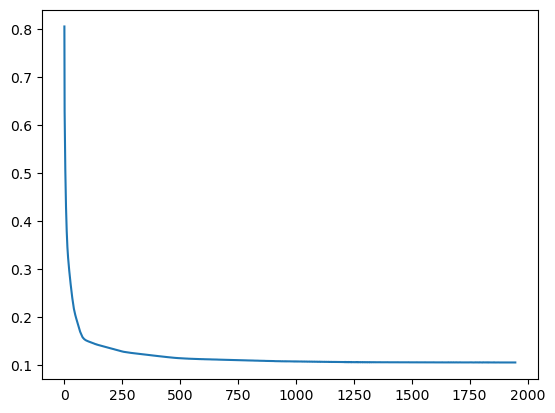

In [11]:
plt.plot(gd1.lvals)
plt.show()

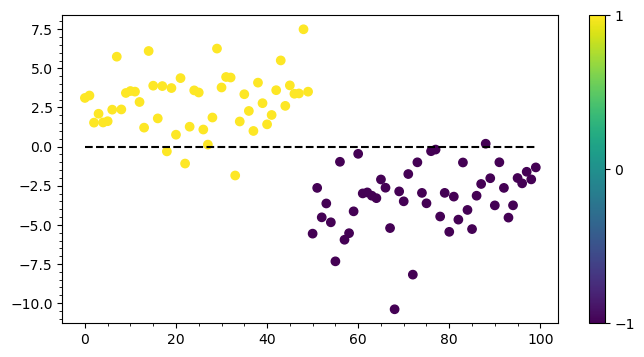

In [12]:
N = len(Y12)
R = linmod1.evaluate(U12)
plt.figure(figsize=(8,4))
sc = plt.scatter(range(N), R, c=Y12)
plt.colorbar(sc, ticks=[-1,0,1])
plt.hlines(0, 0, N-1, colors='k', linestyles='--')
plt.minorticks_on()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(np.sign(linmod1.evaluate(U12)), Y12)

0.96

In [15]:
import mlgrad.cls as cls

In [16]:
linmod2 = models.LinearModel(2)
alg2 = cls.classification_as_regr(U12, Y12, linmod2, hingeloss, h=0.5, n_iter=1000)

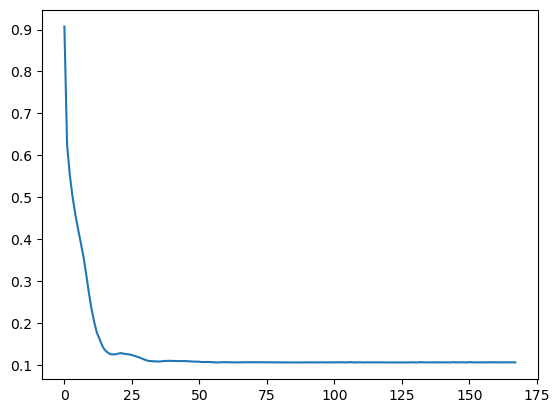

In [17]:
plt.plot(alg2.lvals)
plt.show()

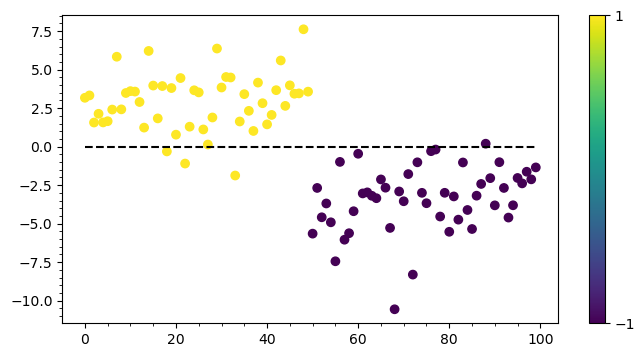

In [18]:
N = len(Y12)
R = linmod2.evaluate(U12)
plt.figure(figsize=(8,4))
sc = plt.scatter(range(N), R, c=Y12)
plt.colorbar(sc, ticks=[-1,1])
plt.hlines(0, 0, N-1, colors='k', linestyles='--')
plt.minorticks_on()
plt.show()

In [26]:
mod3 = models.SigmaNeuronModel(funcs.Sigmoidal(7.0), 2)
errloss = loss.ErrorLoss(funcs.Square())
alg3 = cls.classification_as_regr(U12, Y12, mod3, errloss, h=0.1, n_iter=1000)

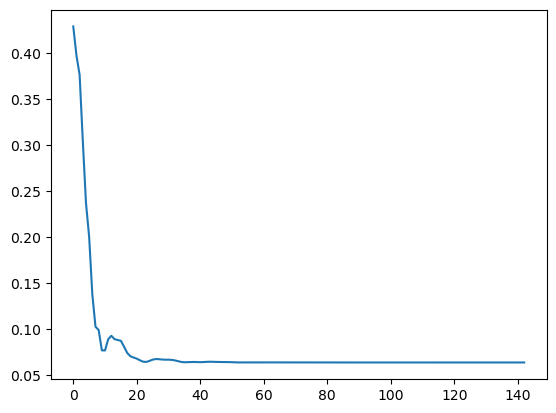

In [27]:
plt.plot(alg3.lvals)
plt.show()

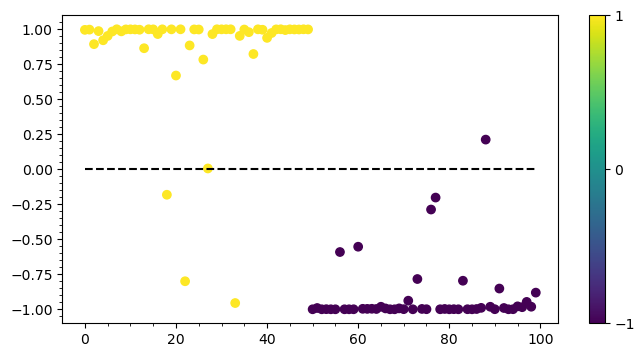

In [28]:
R = mod3.evaluate(U12)
plt.figure(figsize=(8,4))
sc = plt.scatter(range(N), R, c=Y12)
plt.colorbar(sc, ticks=[-1,0, 1])
plt.hlines(0, 0, N-1, colors='k', linestyles='--')
plt.minorticks_on()
plt.show()

In [31]:
mod4 = models.SigmaNeuronModel(funcs.Sigmoidal(3.0), 2)
hingeloss = loss.MarginLoss(funcs.Hinge(1.0))
alg4 = cls.classification_as_regr(U12, Y12, mod4, hingeloss, h=0.1, n_iter=1000)

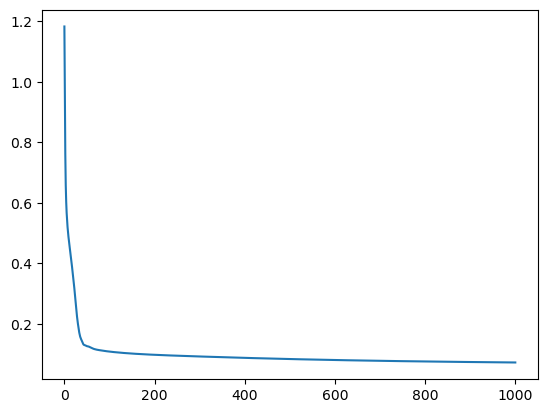

In [32]:
plt.plot(alg4.lvals)
plt.show()

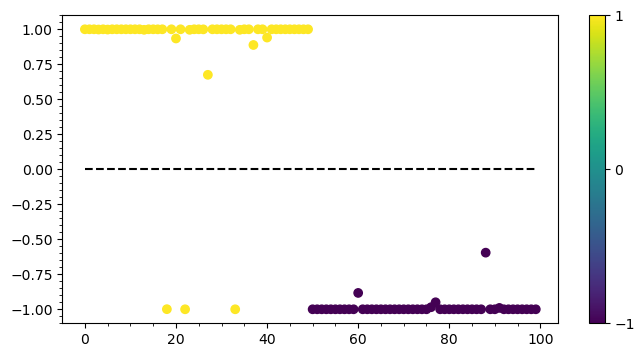

In [33]:
R = mod4.evaluate(U12)
plt.figure(figsize=(8,4))
sc = plt.scatter(range(N), R, c=Y12)
plt.colorbar(sc, ticks=[-1,0, 1])
plt.hlines(0, 0, N-1, colors='k', linestyles='--')
plt.minorticks_on()
plt.show()

In [35]:
accuracy_score(np.sign(mod4.evaluate(U12)), Y12)

0.97